In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Lets load the california_housing Pricing dataset

In [61]:

from sklearn.datasets import fetch_california_housing

In [62]:
california= fetch_california_housing()

In [63]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [64]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [65]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [66]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [67]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# Preparing the Dataset

In [68]:
dataset = pd.DataFrame(california.data, columns = california.feature_names)

In [69]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [70]:
dataset['price'] = california.target

In [71]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [73]:
# summarizing the stats of the dataset
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [74]:
# check the missing values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

# Exploratory Data Analysis(EDA)

In [75]:
import numpy as np
from scipy import stats

def remove_outliers_zscore(dataset, threshold=3):
    z_scores = np.abs(stats.zscore(dataset))
    df = dataset[(z_scores < threshold).all(axis=1)]
    return df

# Example usage:
# Assuming 'data' is your dataset, where each row represents an observation
df = remove_outliers_zscore(dataset)



In [76]:
# Correlation

df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.146407,0.628754,-0.181716,0.005272,-0.080458,-0.080542,-0.016568,0.658217
HouseAge,-0.146407,1.000000,-0.228214,-0.126165,-0.290178,0.000554,0.007983,-0.101065,0.112016
AveRooms,0.628754,-0.228214,1.000000,0.319883,-0.081712,-0.050434,0.133561,-0.076670,0.255413
AveBedrms,-0.181716,-0.126165,0.319883,1.000000,-0.048011,-0.083328,0.069815,0.010892,-0.090918
Population,0.005272,-0.290178,-0.081712,-0.048011,1.000000,0.181155,-0.118762,0.106353,-0.023932
AveOccup,-0.080458,0.000554,-0.050434,-0.083328,0.181155,1.000000,-0.142506,0.151639,-0.253569
Latitude,-0.080542,0.007983,0.133561,0.069815,-0.118762,-0.142506,1.000000,-0.927528,-0.144784
Longitude,-0.016568,-0.101065,-0.076670,0.010892,0.106353,0.151639,-0.927528,1.000000,-0.046023
price,0.658217,0.112016,0.255413,-0.090918,-0.023932,-0.253569,-0.144784,-0.046023,1.000000


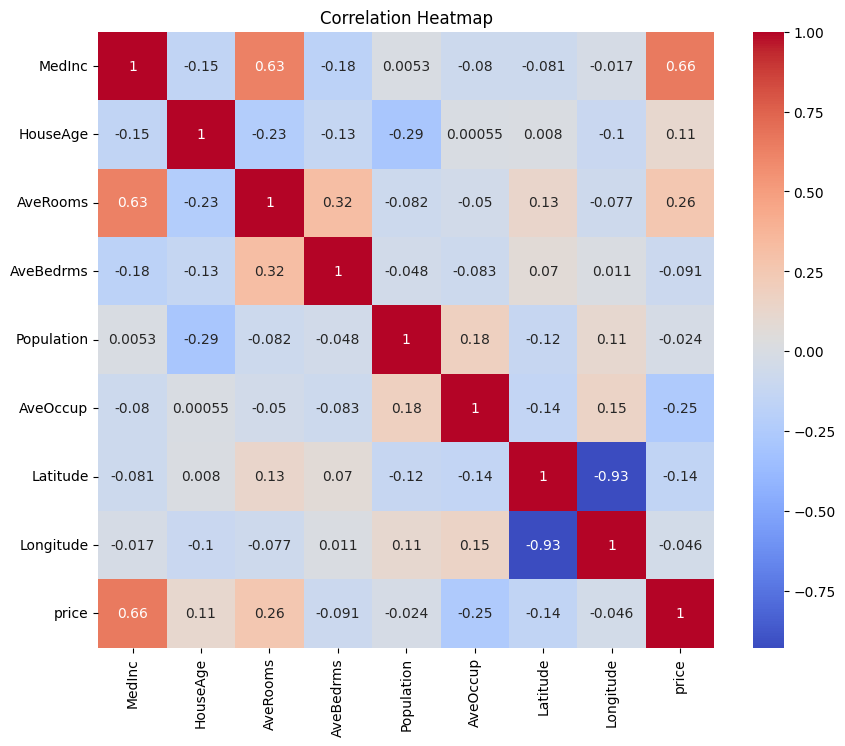

In [77]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()

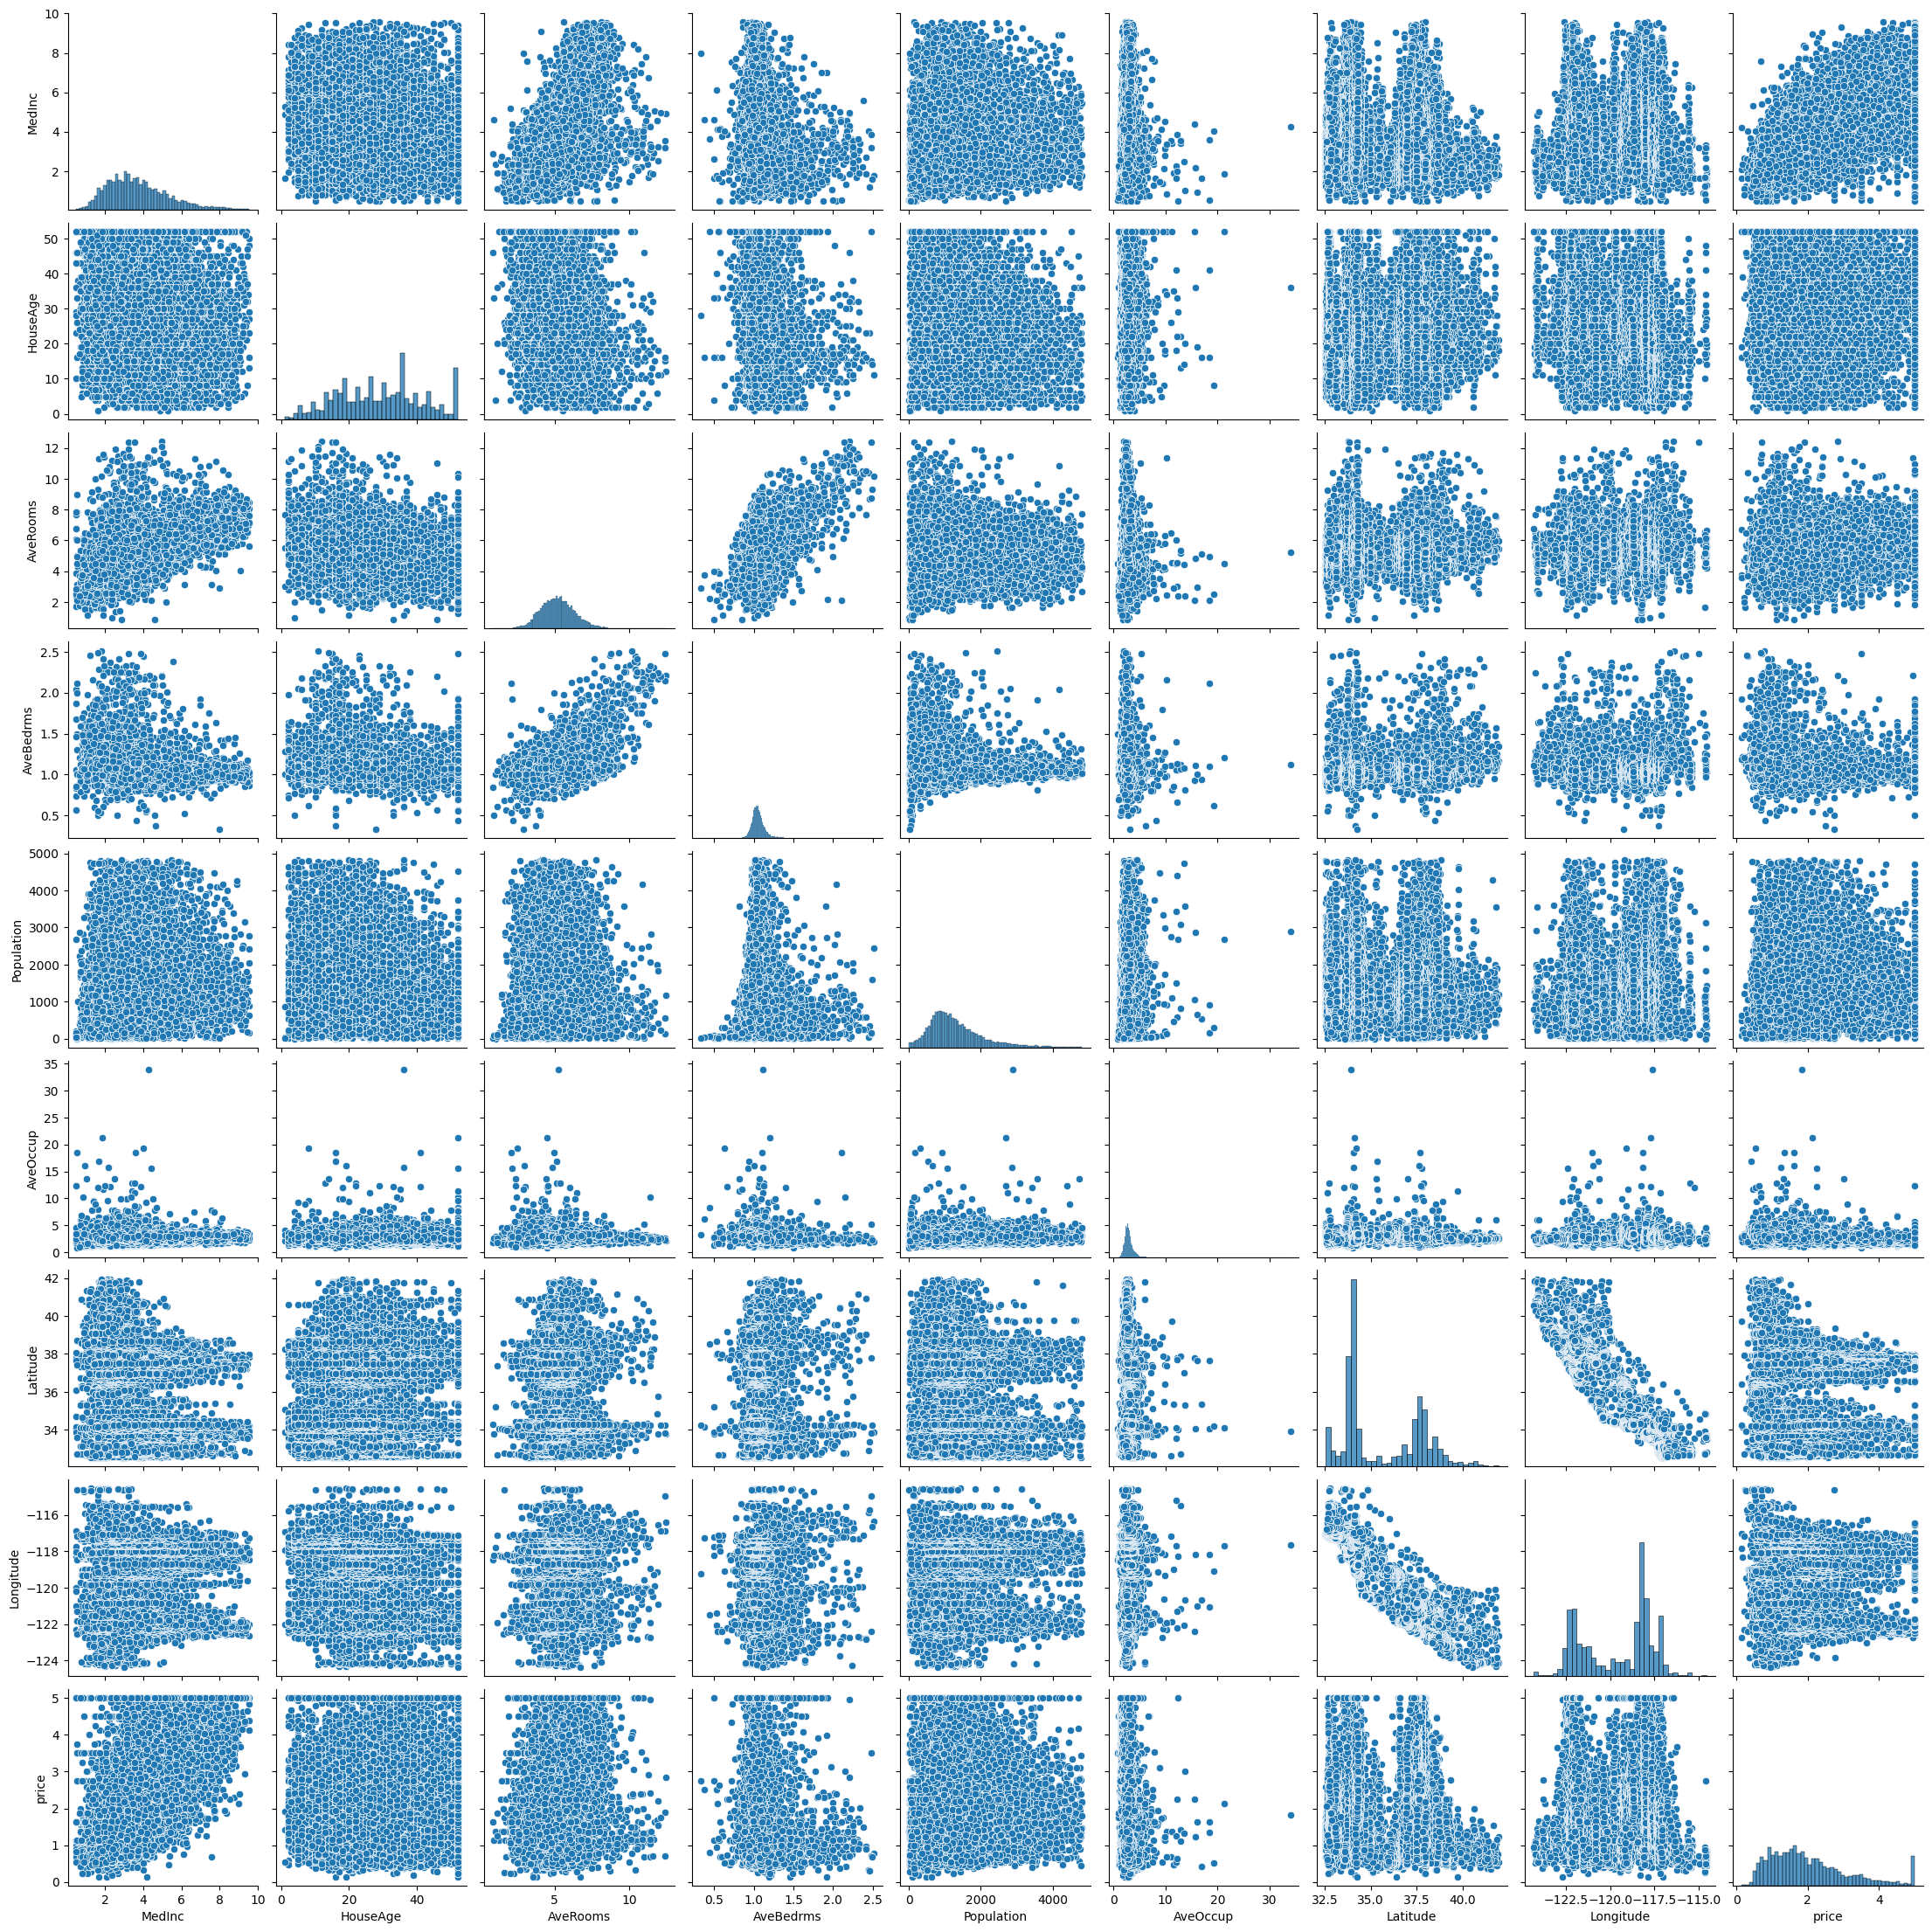

In [78]:
# lets draw a pairplot to visualize the relationship between deifferent pairs of features

sns.pairplot(df)

Text(0, 0.5, 'Price')

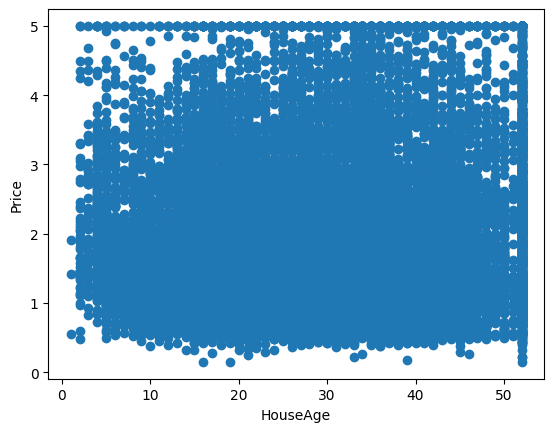

In [79]:
# lets plot a scatterplot between AveBedrms and Price

plt.scatter(df['HouseAge'], df['price'])
plt.xlabel('HouseAge')
plt.ylabel('Price')

<Axes: xlabel='MedInc', ylabel='price'>

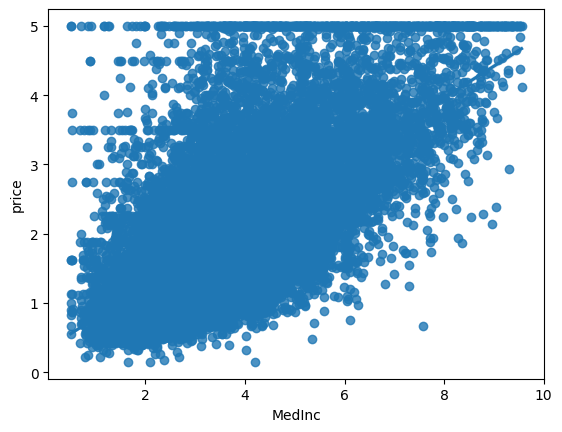

In [80]:
# Regression plot
sns.regplot(x ='MedInc', y = 'price', data = df)

<Axes: xlabel='AveBedrms', ylabel='price'>

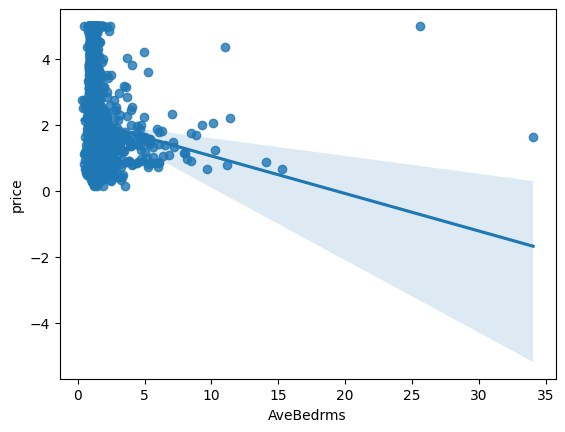

In [81]:
sns.regplot(x ='AveBedrms', y = 'price', data = dataset)

In [82]:
# split the data into dependent and independent features


x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [83]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [84]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 19794, dtype: float64

In [85]:
# Train, Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [86]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14267,1.5933,37.0,3.998331,1.046745,2489.0,4.155259,32.69,-117.11
15249,4.1250,12.0,4.372197,1.095291,1690.0,1.894619,32.98,-117.26
18454,5.8980,18.0,6.129825,1.112281,1055.0,3.701754,37.23,-121.78
3938,5.6345,35.0,5.470085,0.942308,1428.0,3.051282,34.22,-118.58
7430,2.0372,35.0,3.444984,0.993528,2376.0,3.844660,33.95,-118.21
...,...,...,...,...,...,...,...,...
11385,7.3719,22.0,7.104592,1.125000,1086.0,2.770408,33.66,-117.95
18033,7.3522,26.0,6.516539,0.987277,1165.0,2.964377,37.24,-121.94
5373,2.0437,36.0,3.964380,1.017150,2054.0,2.709763,34.04,-118.38
12707,4.1488,37.0,5.616901,0.977465,782.0,2.202817,38.61,-121.40


In [87]:
y_train

14267    0.863
15249    2.269
18454    2.291
3938     2.282
7430     1.608
         ...  
11385    3.374
18033    3.638
5373     3.091
12707    1.364
236      1.220
Name: price, Length: 13855, dtype: float64

In [88]:
# standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [89]:
X_train = scaler.fit_transform(X_train)

In [90]:
X_test = scaler.transform(X_test)

In [91]:
X_train

array([[-1.33374346,  0.64602829, -1.02001718, ...,  1.41016273,
        -1.37635091,  1.23296501],
       [ 0.25160009, -1.36687165, -0.713351  , ..., -1.19479393,
        -1.24115073,  1.1582078 ],
       [ 1.36184779, -0.88377567,  0.72835203, ...,  0.88758537,
         0.7402312 , -1.09447613],
       ...,
       [-1.05170422,  0.56551229, -1.04786534, ..., -0.25549618,
        -0.74697077,  0.60002063],
       [ 0.26650358,  0.64602829,  0.30762411, ..., -0.8396544 ,
         1.38359757, -0.9050912 ],
       [-0.66158334,  1.61222026, -0.85459675, ...,  0.66607626,
         1.00130741, -1.30379632]])

In [92]:
X_test

array([[-0.41266994,  1.53170426, -1.45101664, ..., -1.41830517,
        -0.71433624,  0.6249397 ],
       [ 0.07369745,  0.40448029,  0.17822274, ...,  1.00258819,
        -0.74697077,  0.81930845],
       [ 1.03002588, -0.23964769,  0.66158037, ...,  1.26764531,
        -0.63508096,  0.40565188],
       ...,
       [-0.16212843,  1.04860827, -0.39217452, ..., -0.51398872,
         0.95468665, -1.25894199],
       [-0.03776565,  0.0824163 ,  0.91920529, ...,  0.25659488,
         0.90340383, -0.6210138 ],
       [-0.64298529, -0.40067968, -1.83186226, ...,  1.50820649,
        -0.77028114,  0.67976165]])

In [93]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

# Model Training

# Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
regression = LinearRegression()

In [96]:
regression.fit(X_train, y_train)

LinearRegression()

In [97]:
# print the coefficient and the intercept
print(regression.coef_)

[ 0.81862386  0.15101191 -0.21573732  0.18517707  0.03059037 -0.21284762
 -0.8311709  -0.77902225]


In [98]:
print(regression.intercept_)

2.018678783832557


In [99]:
# parameters used in the model
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [100]:
# prediction
y_test_pred = regression.predict(X_test)

In [101]:
y_test_pred

array([2.52685603, 1.85327667, 2.56594019, ..., 2.31331547, 1.45506538,
       1.59276532])

In [102]:
regression.score(X_test,y_test )

0.6339672800688061

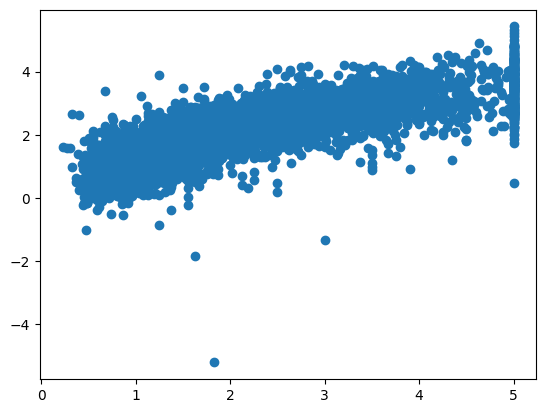

In [103]:
# plot a scatterplot for the prediction
plt.scatter(y_test, y_test_pred)

In [104]:
residuals = y_test - y_test_pred

In [105]:
residuals

4243     0.902144
6267    -0.223277
20459   -0.688940
9746    -0.968164
4877    -0.200761
           ...   
3814    -0.758950
5668     0.412227
698     -0.704315
19589    0.258935
7264     0.039235
Name: price, Length: 5939, dtype: float64

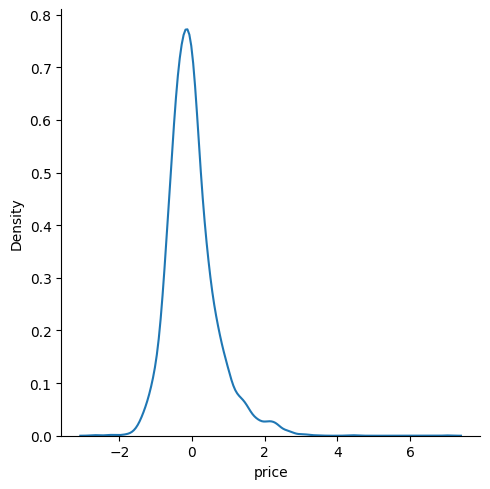

In [106]:
# plot this residuals
sns.displot(residuals, kind = 'kde')

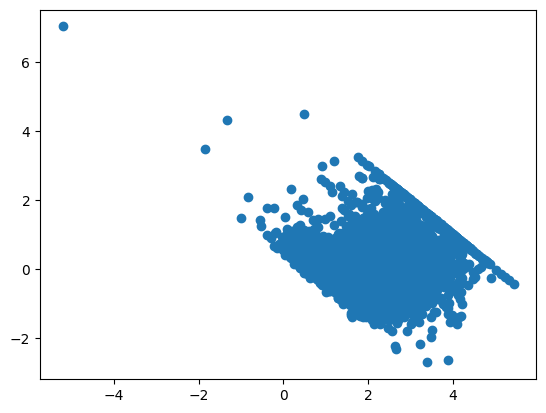

In [107]:
# Scatter plot with respect to prediction and residuals
plt.scatter(y_test_pred, residuals)

In [108]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_test_pred))
print(mean_squared_error(y_test, y_test_pred))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

0.49128988663512646
0.45677043718386284
0.6758479393945526


# R square and adjusted R square
R^2 = 1-SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [109]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_test_pred)
print(score)     

# only 63% of the variance in the dependent variable can be explained by the independent variables in linear regression model

0.6339672800688061


# Adjusted R^2 = 1-[(1-R2)*(n-1)(n-k-1)]

where:
    
R2 = the R2 of the model n : the number of observations K: the number of predictor variables

In [110]:
# display adjusted R-squared
1-(1-score)*len(y_test)-1/(len(y_test)-X_test.shape[1]-1)

-2172.8684923054248

# random forest 

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 0.25553106584111496
R2 Score: 0.7952303313817772


# GridSearchCV to find best model

In [112]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
svm_model = SVR()

# Create a dictionary of models
models = {'Linear Regression': lr_model,
          'Random Forest': rf_model,
          'Gradient Boosting': gb_model,
          'Support Vector Machine': svm_model}

# Perform GridSearchCV for each model
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid={}, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)
    print()

Model: Linear Regression
Mean Squared Error: 0.45677043718386284
R2 Score: 0.6339672800688061

Model: Random Forest
Mean Squared Error: 0.25553106584111496
R2 Score: 0.7952303313817772

Model: Gradient Boosting
Mean Squared Error: 0.27708405161734656
R2 Score: 0.7779588589656743

Model: Support Vector Machine
Mean Squared Error: 0.2974037166292564
R2 Score: 0.7616757074152901



In [113]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [114]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [115]:
california.data[0].shape

(8,)

In [116]:
first_record = california.data[0].reshape(1,-1)

In [117]:
# transformation of new data
scaled_record = scaler.transform(first_record)

c:\Users\sourav sharma\Desktop\end to end ml model\California_house_pricing\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [118]:
scaled_record

array([[ 2.88175373,  0.96809228,  1.4290981 , -0.33575462, -1.25660794,
        -0.43319033,  1.04326608, -1.31874776]])

In [119]:
best_model.predict(scaled_record)

array([4.52299379])

# pickling the model file for Deployment

In [120]:
import pickle

In [121]:
pickle.dump(best_model, open('rfmodel.pkl', 'wb'))

In [122]:
pickle_model = pickle.load(open('rfmodel.pkl', 'rb'))

In [123]:
pickle_model.predict(scaled_record)

array([4.52299379])